In [1]:

from dwdynamics import ComplexDynamicsProblem, Objective,helpers # Difference a. We are using ComplexDynamicsProblem
#import scripts.ptsymmetric as ptsymmetric
from dimod import ExactSolver
import numpy as np
import scipy
import pandas as pd
import numpy as np
import scipy as sp
import math
import pprint
import qutip as qp

In [2]:
# We simulate evolution under the Hamiltonian 1/2 pi * Sigma_y...
SY = np.array([[0, -1.0j], [1.0j, 0.0]])
PSI0 = np.array([1, 0], dtype=np.complex128)  # Difference b. Initial state can now be complex.
H = 0.25*np.pi* SY

problem = ComplexDynamicsProblem(
    hamiltonian=H,      
    initial_state = PSI0,              
    times=tuple(range(2)),             
    num_bits_per_var=2                 
)
qubo = problem.qubo(objective=Objective.norm) 
print(qubo.num_variables)
SY

---------
array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])
16


array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [3]:
exact_solver = ExactSolver()
exact_result = exact_solver.sample(qubo)
exact_result.first.energy

np.float64(0.34314575050761764)

In [4]:
# Let's compute baseline using QuTiP
import qutip as qp

H_exp = int(math.log(len(H),2))
print(H_exp)
psi_0 = qp.tensor([qp.basis(2, 0)] * H_exp)

times = np.linspace(0, 2, 100)
Z1 = qp.tensor(qp.sigmaz(), qp.qeye(2))

if H_exp == 1:
    baseline = qp.mesolve(qp.Qobj(H), psi_0, times, e_ops=[Z1]).expect[0]
elif H_exp == 2:
    baseline = qp.mesolve(qp.Qobj(H,dims=[[2, 2], [2, 2]]), psi_0, times, e_ops=[Z1]).expect[0]


# Define sigma_z for manual computation of expected values
SZ = np.array([[1, 0], [0, -1]])

# decode_sample returns flat vector, we use reshape to form an 6x2 array of states
exact_vec = problem.interpret_sample(exact_result.first.sample)

# Difference d.: We use complex conjugation to compute expected values. For this example it shouldn't matter though.
# Then, for the expectation values we take only the real part, because otherwise matplotlib would complain.
exact_expect = [(state.conj() @ SZ @ state).real for state in exact_vec]

# SA and D-Wave results get the same treatment
#sa_vec = problem.interpret_sample(sa_result.first.sample)
#sa_expect = [(state.conj() @ SZ @ state).real for state in sa_vec]

#dw_vec = problem.interpret_sample(dw_result.first.sample)
#dw_expect = [(state.conj() @ SZ @ state).real for state in dw_vec]



1


ValueError: incompatible dimensions [2, 2] and [2]

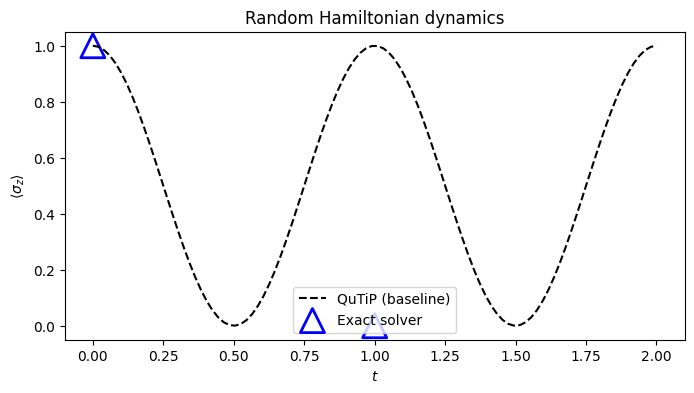

In [ ]:


from matplotlib import pyplot as plt

fig, axis = plt.subplots(figsize=(8, 4))

axis.plot(times, baseline, "k--", label="QuTiP (baseline)")

axis.scatter(problem.times, exact_expect, marker="^", lw=2, s=300, edgecolors="b", facecolors="none", label="Exact solver")
#axis.scatter(problem.times, sa_expect, marker="o", lw=2, s=100, edgecolors="r", facecolors="none", label="SA sampler")
#axis.scatter(problem.times, dw_expect, marker="s", lw=2, s=200, edgecolors="g", facecolors="none", label="D-Wave sampler")
plt.title("Random Hamiltonian dynamics")
axis.set_ylabel(r"$\langle \sigma_z \rangle$")
axis.set_xlabel("$t$")
axis.legend()

#

# Instances

In [ ]:
# 1. Pauli-Z
H1 = np.array([
    [1, 0],
    [0, -1]
])

# -0.5(X+Z)
H2 = 0.5 * np.array([
    [1, 1],
    [1, -1]
])

# 3. Cyclic permutation 
H3 = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])  # !! not Hermitian !!

# iY
H4 = 1j * np.array([
    [0, -1],
    [1,  0]
])  

# 5.entangling on 2 qubits
H5 = 0.5 * np.array([
    [1, 1, 1, -1],
    [1, 1, -1, 1],
    [1, -1, 1, 1],
    [-1, 1, 1, 1]
]) 

# Try out hermitian unitary matrices

$$
  e^{iM\Theta} = I\cos\Theta+iM\sin\Theta \text{ if } M^2=I
$$
### Pauli / Significant

In [ ]:
import scipy.linalg


ox = np.array([[0, 1],[1,0]])
oz = np.array([[1,0],[0,-1]])
s_gate = np.array([[1,0],[0,1.0j]])
# rotation matrix
def rot(alpha):
    return np.array([[math.cos(alpha), -math.sin(alpha)*1.0j],[math.sin(alpha)*1.0j, math.cos(alpha)]])

hadamard = 1/math.sqrt(2) * np.array([[1,1],[1,-1]])

# entangled qubits
H = np.pi * (1/2) * np.array([
    [1, 1, 1, -1],
    [1, 1, -1, 1],
    [1, -1, 1, 1],
    [-1, 1, 1, 1]
])
pprint.pprint(H)

PSI0 = np.array([1,0,0,0], dtype=np.complex128)  
print(sp.linalg.expm(1.0j * H))

array([[ 1.57079633,  1.57079633,  1.57079633, -1.57079633],
       [ 1.57079633,  1.57079633, -1.57079633,  1.57079633],
       [ 1.57079633, -1.57079633,  1.57079633,  1.57079633],
       [-1.57079633,  1.57079633,  1.57079633,  1.57079633]])
[[-1.00000000e+00-1.11022302e-16j -1.54074396e-32-1.11022302e-16j
   2.77555756e-17+4.16333634e-17j  8.32667268e-17-1.52655666e-16j]
 [-2.77555756e-16-2.08166817e-16j -1.00000000e+00-1.80411242e-16j
   2.77555756e-17-5.55111512e-17j  8.32667268e-17+1.66533454e-16j]
 [-2.31111593e-32+8.32667268e-17j  1.11022302e-16+2.77555756e-17j
  -1.00000000e+00+1.52655666e-16j  2.77555756e-17+2.91433544e-16j]
 [-8.32667268e-17-2.08166817e-16j  2.08000434e-32+1.52655666e-16j
  -2.77555756e-17+2.49800181e-16j -1.00000000e+00+4.16333634e-16j]]


In [125]:
a = math.sin(np.pi/6)*1.0j
b = math.sqrt(1.25)
PT1 = np.pi*np.array(
    [[a,b],
     [b.conjugate(), a.conjugate()]])
print(PT1)
eigv, eigvector = np.linalg.eig(PT1)
print(eigvector)
print(helpers.is_ptsymmetric(PT1))
sp.linalg.expm(PT1*1.0j)

[[0.        +1.57079633j 3.51240737+0.j        ]
 [3.51240737+0.j         0.        -1.57079633j]]
[[ 0.63245553+0.31622777j -0.63245553+0.31622777j]
 [ 0.70710678+0.j          0.70710678+0.j        ]]
True


array([[-1.+0.0000000e+00j,  0.-6.5720134e-16j],
       [ 0.-4.4408921e-16j, -1.+0.0000000e+00j]])

In [81]:
math.sqrt(-0.25+1)

0.8660254037844386

In [126]:
problem = ComplexDynamicsProblem(
    hamiltonian=PT1,      
    initial_state = PSI0,              
    times=tuple(range(2)),             
    num_bits_per_var=2 
    )                                                       
qubo = problem.qubo(objective=Objective.norm) 
print(qubo.num_variables)
exact_solver = ExactSolver()            
exact_result = exact_solver.sample(qubo)      
exact_result.first.energy     

---------
array([[-1.+0.00000000e+00j,  0.+6.57201340e-16j],
       [ 0.+7.77156117e-16j, -1.+0.00000000e+00j]])
16


np.float64(-5.329070518200751e-15)

# Compare with qutip

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


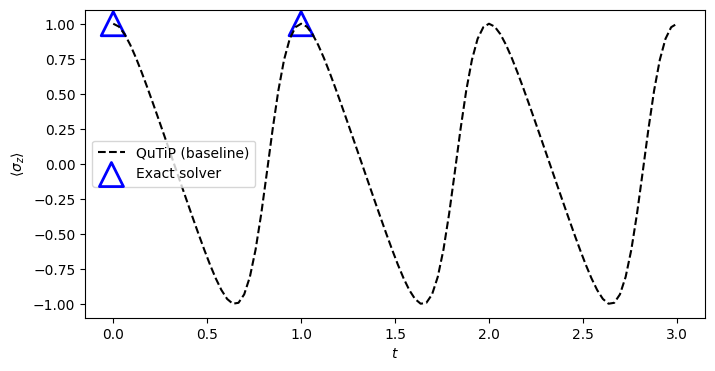

In [127]:
# Let's compute baseline using QuTiP
import qutip as qp

psi_0 = qp.basis(2, 0)
print(psi_0)
times = np.linspace(0, 3, 100)
baseline = qp.mesolve(qp.Qobj(qp.Qobj(PT1)), psi_0, times, e_ops=[qp.sigmaz()]).expect[0]
# Define sigma_z for manual computation of expected values
SZ = np.array([[1, 0], [0, -1]])

# decode_sample returns flat vector, we use reshape to form an 6x2 array of states
exact_vec = problem.interpret_sample(exact_result.first.sample)

# Difference d.: We use complex conjugation to compute expected values. For this example it shouldn't matter though.
# Then, for the expectation values we take only the real part, because otherwise matplotlib would complain.
exact_expect = [(state.conj() @ SZ @ state).real for state in exact_vec]
from matplotlib import pyplot as plt

fig, axis = plt.subplots(figsize=(8, 4))

axis.plot(times, baseline, "k--", label="QuTiP (baseline)")

axis.scatter(problem.times, exact_expect, marker="^", lw=2, s=300, edgecolors="b", facecolors="none", label="Exact solver")

axis.set_ylabel(r"$\langle \sigma_z \rangle$")
axis.set_xlabel("$t$")
axis.legend()
plt.show()